In [1]:
%matplotlib inline

import sys
import os
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import open3d as o3d

project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
if project_root not in sys.path:
    sys.path.append(project_root)

from lib.planar_patch_detector import PlanarPatchDetector
from lib.masked_yolo_detector import MaskedYOLODetector
from lib.utils import get_camera_intrinsics

In [2]:
# Load depth image
depth_path = "../data/medium_box/raw_depth.png"
depth_image = cv.imread(depth_path, cv.IMREAD_ANYDEPTH)

if depth_image is None:
    raise FileNotFoundError(f"Failed to load depth image from {depth_path}")

# read camera intrinsics
intrinsics_path = "../data/small_box/intrinsics.json"
camera_intrinsics = get_camera_intrinsics(intrinsics_path)




0: 480x640 4 medium_boxs, 19 small_boxs, 192.4ms
Speed: 7.2ms preprocess, 192.4ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 640)


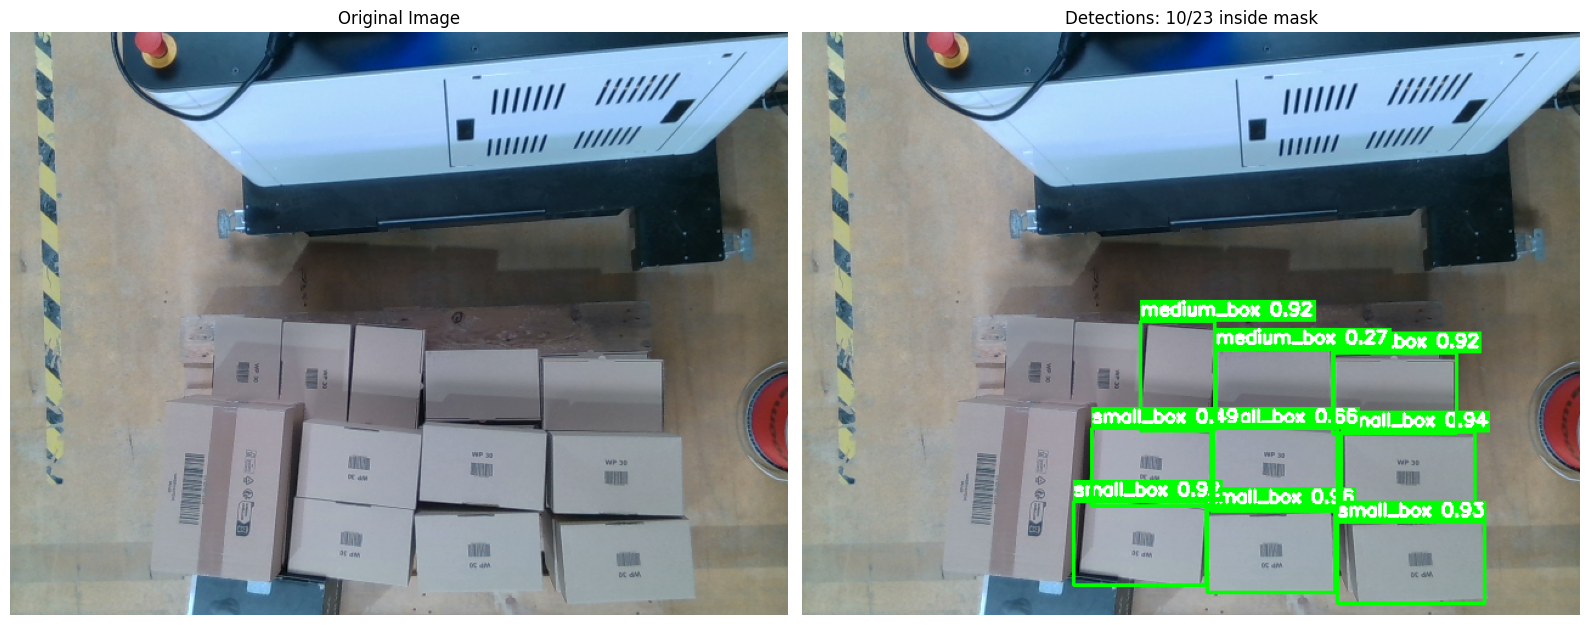

Found 10 boxes inside the mask:
Class: small_box, Confidence: 0.96, Box: (333, 392, 438, 461)
Class: small_box, Confidence: 0.94, Box: (443, 329, 553, 399)
Class: small_box, Confidence: 0.93, Box: (440, 403, 561, 470)
Class: small_box, Confidence: 0.92, Box: (223, 386, 332, 455)
Class: medium_box, Confidence: 0.92, Box: (278, 238, 339, 328)
Class: small_box, Confidence: 0.92, Box: (436, 264, 538, 330)
Class: small_box, Confidence: 0.66, Box: (336, 326, 440, 394)
Class: small_box, Confidence: 0.49, Box: (238, 326, 338, 390)
Class: small_box, Confidence: 0.30, Box: (340, 261, 436, 324)
Class: medium_box, Confidence: 0.27, Box: (340, 261, 437, 323)

Detailed mask overlap analysis:
small_box: 0.96 - Mask overlap: 100.00%
small_box: 0.94 - Mask overlap: 100.00%
small_box: 0.93 - Mask overlap: 100.00%
small_box: 0.92 - Mask overlap: 100.00%
medium_box: 0.92 - Mask overlap: 100.00%
small_box: 0.92 - Mask overlap: 100.00%
small_box: 0.66 - Mask overlap: 100.00%
small_box: 0.49 - Mask overlap: 

In [3]:
# run masked yolo detector
color_image = cv.imread("../data/small_box/color_image.png")
depth_image = cv.imread("../data/small_box/raw_depth.png", cv.IMREAD_ANYDEPTH)

yolo_detector = MaskedYOLODetector(
        color_image=color_image,
        depth_image=depth_image,
        model_path="/workspace/data/model/best.pt"
    )
yolo_detector.set_box_area(min_area=2000, max_area=10000)
yolo_detector.create_mask()
boxes = yolo_detector.run_detection(visualize=True)
yolo_detector.print_box_details()

In [4]:
print(boxes)

[('small_box', 0.9647466540336609, (333, 392, 438, 461)), ('small_box', 0.9398967623710632, (443, 329, 553, 399)), ('small_box', 0.93170565366745, (440, 403, 561, 470)), ('small_box', 0.9236579537391663, (223, 386, 332, 455)), ('medium_box', 0.919619083404541, (278, 238, 339, 328)), ('small_box', 0.9191368222236633, (436, 264, 538, 330)), ('small_box', 0.6579309105873108, (336, 326, 440, 394)), ('small_box', 0.4872472286224365, (238, 326, 338, 390)), ('small_box', 0.30067601799964905, (340, 261, 436, 324)), ('medium_box', 0.2713591456413269, (340, 261, 437, 323))]



 Detection 0 (class: small_box) - found 2 planar patches
   - Patch 0: normal=[  -0.058676    0.012597     -0.9982], alignment_score=0.650, inliers=4
   - Patch 1: normal=[    0.88819     0.12863     -0.4411], alignment_score=1.064, inliers=0
No valid patches left after filtering (small planes).


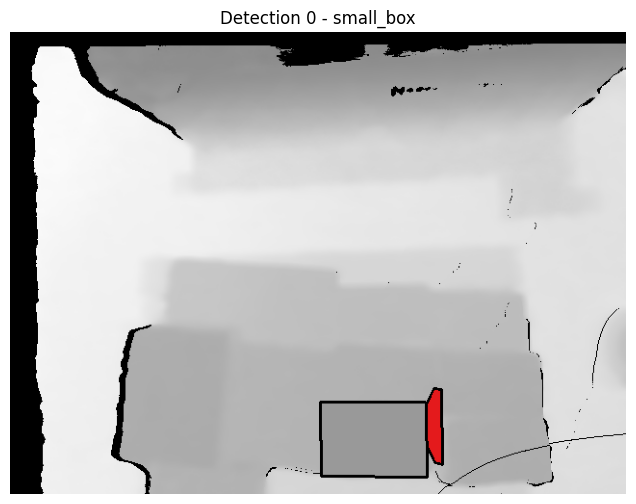


 Detection 1 (class: small_box) - found 2 planar patches
   - Patch 0: normal=[    0.50096   -0.099096    -0.85978], alignment_score=0.338, inliers=3
   - Patch 1: normal=[  -0.022768       -0.37    -0.92875], alignment_score=0.922, inliers=2
No valid patches left after filtering (small planes).


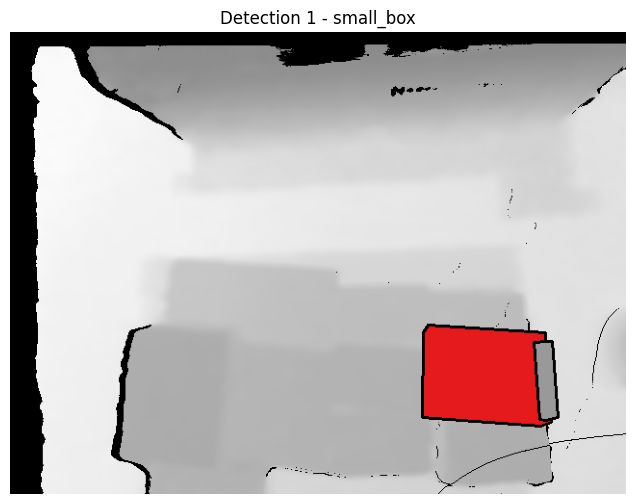


 Detection 2 (class: small_box) - found 4 planar patches
   - Patch 0: normal=[   -0.23718     0.77502    -0.58574], alignment_score=0.509, inliers=0
   - Patch 1: normal=[    0.90742 -0.00016927    -0.42023], alignment_score=0.814, inliers=3
   - Patch 2: normal=[    0.42331   -0.041394    -0.90504], alignment_score=0.340, inliers=2
   - Patch 3: normal=[   -0.11066   -0.013242    -0.99377], alignment_score=0.705, inliers=1
No valid patches left after filtering (small planes).


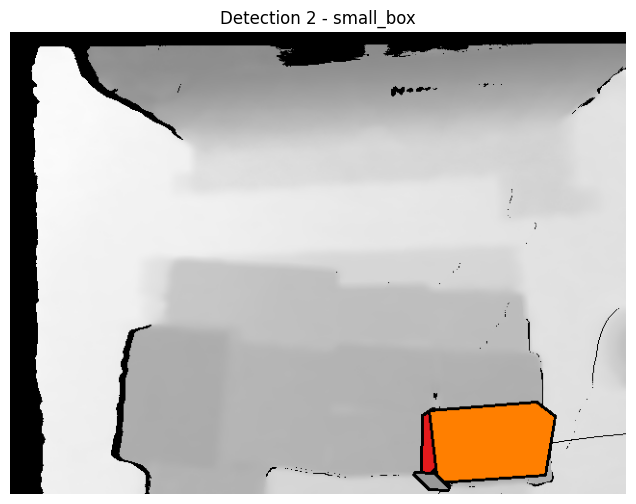


 Detection 3 (class: small_box) - found 2 planar patches
   - Patch 0: normal=[    0.96798    0.074356    -0.23977], alignment_score=0.932, inliers=0
   - Patch 1: normal=[  -0.046991   -0.011113    -0.99883], alignment_score=0.756, inliers=0
No valid patches left after filtering (small planes).


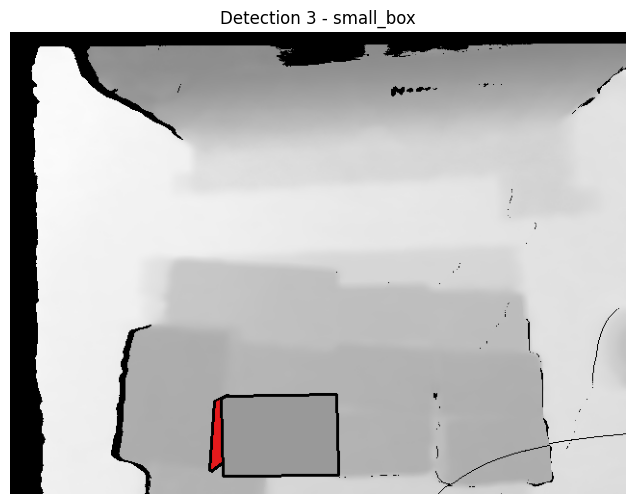


 Detection 4 (class: medium_box) - found 3 planar patches
   - Patch 0: normal=[  -0.092319    -0.91945    -0.38222], alignment_score=1.239, inliers=2
   - Patch 1: normal=[   0.018419    -0.97269    -0.23139], alignment_score=1.282, inliers=0
   - Patch 2: normal=[  -0.092983   -0.077526    -0.99264], alignment_score=0.910, inliers=1
No valid patches left after filtering (small planes).


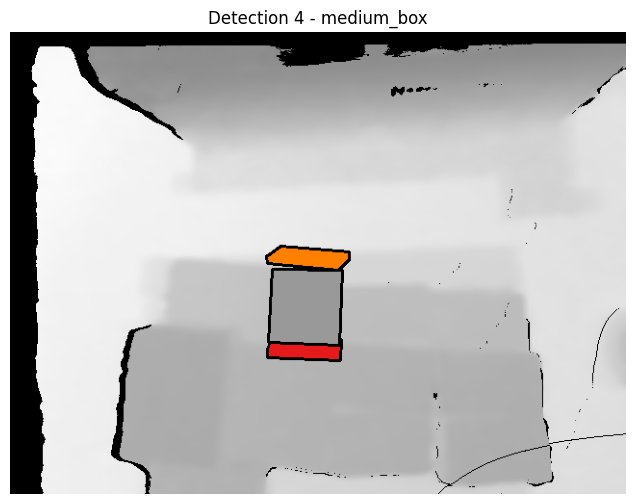


 Detection 5 (class: small_box) - found 3 planar patches
   - Patch 0: normal=[    0.69735    -0.17037    -0.69618], alignment_score=0.738, inliers=2
   - Patch 1: normal=[   0.037699     -0.9539    -0.29776], alignment_score=1.546, inliers=0
   - Patch 2: normal=[-0.00068744    -0.23009    -0.97317], alignment_score=0.640, inliers=2
No valid patches left after filtering (small planes).


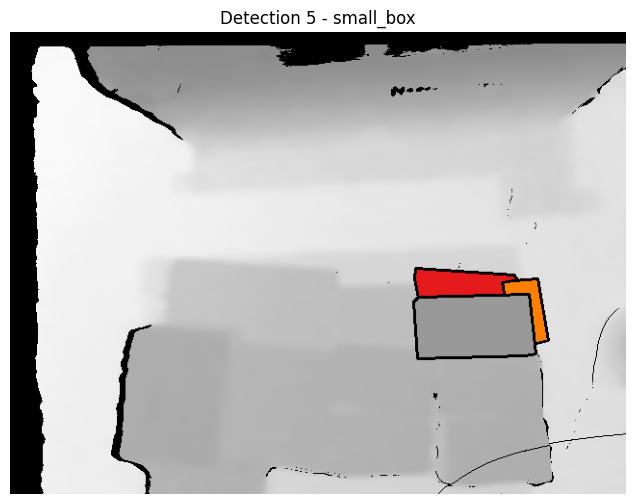


 Detection 6 (class: small_box) - found 1 planar patches
   - Patch 0: normal=[  -0.047433   -0.094897    -0.99436], alignment_score=0.702, inliers=3
No valid patches left after filtering (small planes).


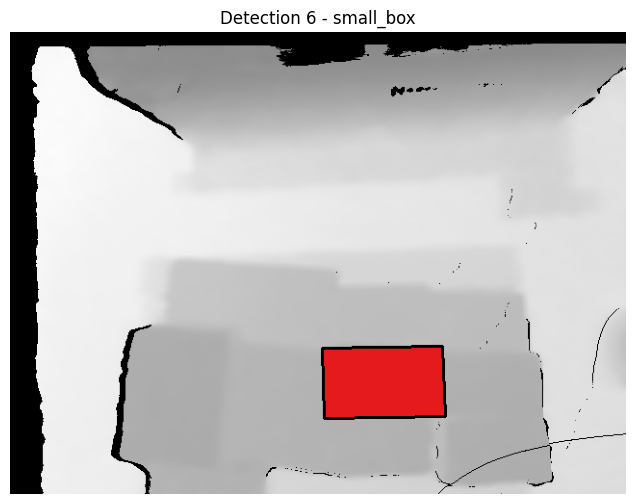


 Detection 7 (class: small_box) - found 1 planar patches
   - Patch 0: normal=[  -0.059461   -0.068321    -0.99589], alignment_score=0.713, inliers=0
No valid patches left after filtering (small planes).


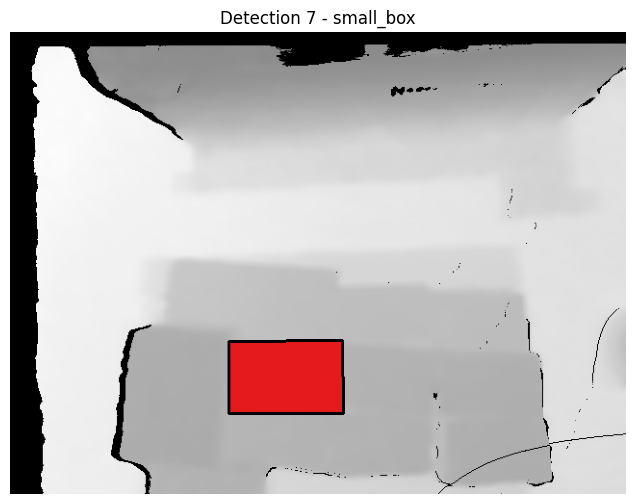


 Detection 8 (class: small_box) - found 4 planar patches
   - Patch 0: normal=[   0.082988    -0.99202   -0.094941], alignment_score=0.957, inliers=4
   - Patch 1: normal=[   0.058534    -0.99092    -0.12106], alignment_score=1.004, inliers=5
   - Patch 2: normal=[     0.4083    -0.89088    -0.19905], alignment_score=0.901, inliers=0
   - Patch 3: normal=[  -0.015607    -0.09706    -0.99516], alignment_score=0.732, inliers=1
No valid patches left after filtering (small planes).


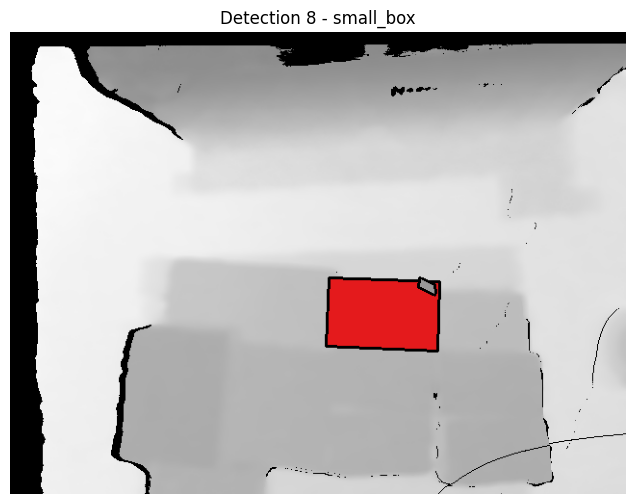


 Detection 9 (class: medium_box) - found 3 planar patches
   - Patch 0: normal=[   0.065173    -0.99253    -0.10315], alignment_score=1.274, inliers=2
   - Patch 1: normal=[    0.40729    -0.89124    -0.19952], alignment_score=1.019, inliers=2
   - Patch 2: normal=[  -0.011365    -0.11337    -0.99349], alignment_score=0.380, inliers=0
No valid patches left after filtering (small planes).


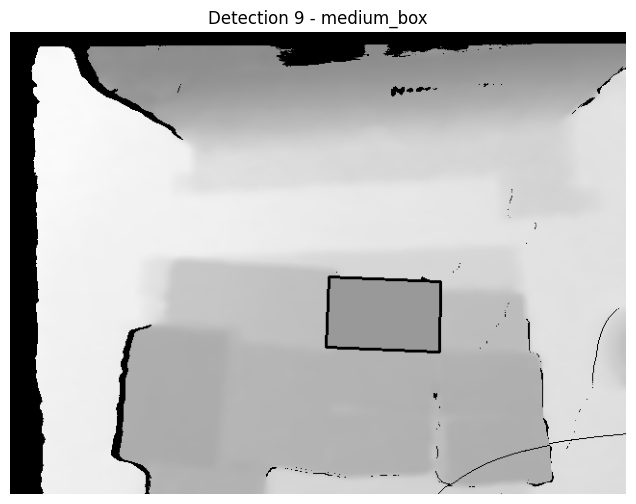

In [5]:
known_dims = {
        'small_box': [0.340, 0.250, 0.095],
        'medium_box': [0.255, 0.155, 0.100]
    }

# run planar patch detector
planar_detector = PlanarPatchDetector(
    color_img=color_image,
    depth_img=depth_image,
    intrinsics=camera_intrinsics,
    known_dims=known_dims
)

planar_detector.set_yolo_detections(boxes)
#run_interactive_slider(planar_detector)

# planar_detector.process_all(visualize=True,
#                             visualize_individual=True,
#                             mode='2d',
#                             normal_variance_threshold_deg=60,
#                             coplanarity_deg=60,
#                             min_plane_edge_length=0.03,
#                             min_num_points=20,
#                             knn=50
#                         )

planar_detector.process_all(
    visualize=False,
    visualize_individual=True,
    mode='2d',
    normal_variance_threshold_deg=60,
    coplanarity_deg=60,
    min_plane_edge_length=0.03,
    min_num_points=20,
    knn=50,
    voxel_size=0.01,  # Change voxel size
    distance_threshold=0.005,  # Change the RANSAC distance threshold
    nb_neighbors=30,  # Change number of neighbors for outlier removal
    std_ratio=1.5, # Adjust standard deviation ratio for outlier removal
    min_plane_area=0.00003  # Minimum area of the detected plane
)


# planar_detector.process_all(visualize=False, visualize_individual=False)

results = planar_detector.get_results()



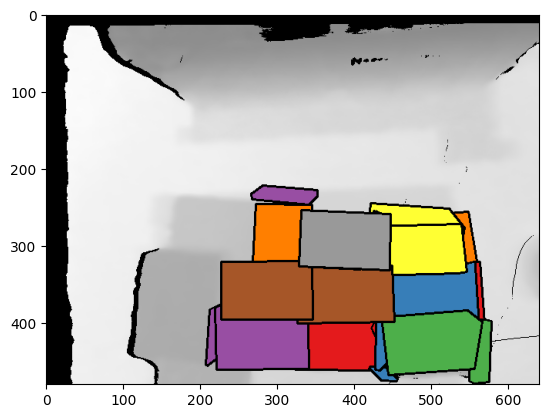

In [6]:
overlay = planar_detector.visualize_full_2d()

plt.imshow(overlay)